# SCS 3546: Deep Learning
> Assignment 1: Deep Learning Using Keras

### Your name & student number:

<pre> Please enter your name here. </pre>

<pre> Please enter your student number here. </pre>

In [ ]:
# NOTE: if the plotly graph object plots do not render below
# (sometimes they don't get saved properly), you may need to re-run the cells
# to display them. The numbers may come out slightly differently than what's 
# reported here, due to the inherent stochasticity of training (I have not
# set any random seeds)

# Since this can happen with the notebooks you submit, I suggest instead doing
# your plots with matplotlib.pyplot. They won't look as fancy, but they'll 
# definitely render correctly. 

## Assignment Description

In this assignment you will demonstrate your ability to:

- Train a neural network using Keras to solve a regression problem. 

- Perform sensible data preprocessing. 

- Experiment with hyperparemter tuning and different model architectures to achieve best performance. 



### Grade Allocation

**15 points total**

- Part 1: 4 Marks
- Part 2: 9 Marks
- Clarity: 2 Marks

The marks for clarity are awarded for code documentation and how well you explained/supported your answers, including the use of visualizations where appropriate. 

In [ ]:
# setting up the notebook with important libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Preamble

### Hyperparameters

A hyperparameter is a parameter whose value is set before the learning process begins.

Some important Neural Networks hyperparameters include:

- number of hidden layers
- number of neurons
- learning rate
- activation function
- optimizer settings

Hyperparameters are crucial to the performance, speed, and quality of the machine learning models.

Through Hyper parameter optimization, we find a tuple (best combination) of hyperparameters that yields an optimal model which minimizes a predefined loss function on given test data.

Important hyperparameters that could be tuned include:

- num_hidden_layers
- neurons_per_layer
- dropout_rate
- activation
- optimizer
- learning_rate
- batch_size

### Loss Function

- MSE (Mean Squared Error) is used as the score/loss function that will be minimized for hyperparameter optimization.
- In this assignment, we are going to use Cross-Validation to calculate the score (MSE) for a given set of hyperparameter values

- MSE is a desirable metric because by taking the square root gives us an error value we can directly understand in the context of the problem; for example, in this assignment it translates to thousands of dollars

- Note: Your results may vary given the stochastic nature of the algorithm, evaluation procedure, or differences in numerical precision

## Dataset Description

We will be using the **Boston Housing dataset** for this assignment. This dataset was collected in 1978 by the US Census Service, and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.

You are **not** expected to perform Exploratory Data Analysis (EDA) on this dataset. 

The information and plots that follow are meant to help you get familiar with the data. Your efforts on this assignment should focus on **model training and hyperparameter tuning**, not on EDA. 

Features Include:
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town.
- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- B: Proportion of African Americans by town
- LSTAT: Percent lower status of the population
- MEDV: Median value of owner-occupied homes in  1000’s dollars (i.e. the outcome variable) 

Below is a sample of this data:

In [ ]:
# NOTE: as of recently, the code below will trigger a deprecation warning; 
# for now you can ignore it; we will be migrating to a different dataset next term
from sklearn.datasets import load_boston
import pandas as pd
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df['MEDV'] = boston_dataset.target
df.head(n=5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The boxplots below help you understand the univariate distributions of these features. Take note of any outliers.

In [ ]:
import math

from plotly.subplots import make_subplots
import plotly.graph_objects as go

total_items = len(df.columns)
items_per_row = 3
total_rows = math.ceil(total_items / items_per_row)
fig = make_subplots(rows=total_rows, cols=items_per_row)

cur_row = 1
cur_col = 1
for index, column in enumerate(df.columns):
    fig.add_trace(go.Box(y=df[column], name=column), row=cur_row, col=cur_col)
    
    if cur_col % items_per_row == 0:
        cur_col = 1
        cur_row = cur_row + 1     
    else:
        cur_col = cur_col + 1
    
fig.update_layout(height=1000, width=550,  showlegend=False)
fig.show()

The plots below show how each feature trends with `MEDV`, which is the target variable we seek to predict; `MEDV` is on the y-axis, while the feature value is on the x-axis.

In [ ]:
import math

import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

total_items = len(df.columns)
items_per_row = 3
total_rows = math.ceil(total_items / items_per_row)
fig = make_subplots(rows=total_rows, cols=items_per_row, subplot_titles=df.columns)

cur_row = 1
cur_col = 1
for index, column in enumerate(df.columns):
    fig.add_trace(
        go.Scattergl(
            x=df[column], 
            y=df['MEDV'], 
            mode="markers", 
            marker=dict(size=3)
        ), 
        row=cur_row, 
        col=cur_col
    )
    
    intercept = np.poly1d(np.polyfit(df[column], df['MEDV'], 1))(np.unique(df[column]))
    
    fig.add_trace(
        go.Scatter(
            x=np.unique(df[column]), 
            y=intercept, 
            line=dict(color='red', width=1)
        ), 
        row=cur_row, 
        col=cur_col
    )
    
    if cur_col % items_per_row == 0:
        cur_col = 1
        cur_row = cur_row + 1
    else:
        cur_col = cur_col + 1
    
fig.update_layout(height=1000, width=550, showlegend=False)
fig.show()

# Assignment Start
***

- Please follow all instructions carefully. 

- Use MSE (Mean Squared Error) as the score/loss function that will be minimized during optimization.








#Data Import

The code below imports the data for you as numpy arrays. The feature columns are in the same order as the list of features given earlier. 

In [ ]:
from tensorflow.keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [ ]:
print(X_train.shape) # these are the features
print(y_train.shape) # this is the target label (MEDV)

(404, 13)
(404,)


# Part 1: Impact of Changing Model Architecture

In this section, we will be comparing a simple single-layer baseline model with two other models having a different network topology. 

## a) Baseline model [2 points]

Use Keras to develop a baseline neural network model that has **one single fully-connected hidden layer with the same number of neurons as input features (i.e. 13 neurons).**

Make sure to **standardize** your features (i.e. subtract mean and divide by standard deviation) before training your model. You can also perform any other data-preprocessing that you deem necessary.

- Note: No activation function is used for the output layer because it is a regression problem and we are interested in predicting numerical values directly without transformation.

- The ADAM optimization algorithm should be used to optimize mean squared error loss function.

- Plot learning curves and report on both training and validation performance.

In [ ]:
# =====
# First we'll demo a convenient way to build an inference pipeline, 
# using the KerasRegressor class and `cross_val_score`
# =====
import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor


# construct the baseline model
def baseline_model():
  
	# He Normal random initialization works best with ReLU
  initializer = tf.keras.initializers.HeNormal()

  model = tf.keras.Sequential()
  model.add(Dense(16, input_dim=13, kernel_initializer=initializer, activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))

  model.compile(loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()], optimizer='adam')

  return model

# add data standardization to the start of the transformation pipeline
transformations = []
transformations.append(('standardize', StandardScaler()))
transformations.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=12, verbose=0)))
model_pipeline = Pipeline(transformations)

# evaluate results; note that Cross-Val wasn't required for this first experiment, 
# but we'll demo it anyway
kfold = KFold(n_splits=3)
results = cross_val_score(model_pipeline, X_train, y_train, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Standardized: -23.21 (3.66) MSE


In [ ]:
# The result reports the mean squared error including the average and standard deviation.
# Please note that the RMSE here is negative because scikit-learn inverts so that the metric 
# is maximized instead of minimized. So we can can ignore the negative sign.


In [ ]:
# =====
# When training a model, we should always plot the train and val learning curves, 
# because this is one of the best indicators we have about whether a model is 
# converging, overfitting, etc. To do this, we need to return the model's history
# (i.e. performance at each iteration). So we'll implement our cross-validation
# training function in a slightly different way, so that we can access the 
# `history` metadata returned by `model.fit()`. Below, we write some general-purpose
# functions we'll use throughout the remainder of this assignment for k-fold CV 
# training, and plotting the learning curves. 
# =====

# first, let's standardize our data upfront, rather than baking that into 
# an estimator pipeline
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [ ]:
# now let's define some helpful functions

import numpy as np
import plotly.graph_objects as go

def train_model_with_cv(estimator, X_train, y_train, epochs=100, num_splits=3, verbose=0):
  """
  Trains a model using cross-validation and returns the training
  history for the first fold. 
  """
  reported_history = None
  kfold = KFold(n_splits=num_splits)

  # Note: we'd typically pick the model at the epoch with best performance
  # as our 'final model'
  best_val_maes = [] # stores best val MAE obtained for each fold

  for fold_num, (train_index, val_index) in enumerate(kfold.split(X_train)):
    history = estimator.fit(
      X_train[train_index], 
      y_train[train_index], 
      epochs=epochs, 
      validation_data=(X_train[val_index], y_train[val_index]),
      verbose=verbose
    )

    best_val_maes.append(min(history.history["val_mean_absolute_error"]))

    if fold_num == 0:
      # we'll return the learning curves of the first fold
      reported_history = history

  mae_mean = np.mean(best_val_maes)
  mae_std = np.std(best_val_maes)
  print(
    f"Model achieved validation MAE = {round(mae_mean, 2)} +/- {round(mae_std, 2)} "
    f"over {num_splits} cross-val folds and {epochs} epochs."
  )

  return reported_history, mae_mean, mae_std


def plot_learning_curves(history):
  """Plots train and val learning curves for MEA (loss)
  and MAE (our metric), given a model training history. 
  """

  fig = go.Figure()
  fig.add_trace(
    go.Scattergl(y=history.history['loss'], name='Train Loss')
  )
  fig.add_trace(
    go.Scattergl(y=history.history['val_loss'], name='Val Loss')
  )
  fig.update_layout(
    height=500, 
    width=900,
    xaxis_title='Epoch',
    yaxis_title='Mean Squared Error (Loss)'
  )
  fig.show() 


  fig = go.Figure()
  fig.add_trace(
    go.Scattergl(y=history.history['mean_absolute_error'], name='Train MAE')
  )
  fig.add_trace(
    go.Scattergl(y=history.history['val_mean_absolute_error'], name='Val MAE')
  )
  fig.update_layout(
    height=500, 
    width=900,
    xaxis_title='Epoch',
    yaxis_title='Mean Absolute Error'
  )
  fig.show() 

In [ ]:
# let's try it out!
history, mae_mean, mae_std = train_model_with_cv(
  estimator=baseline_model(), 
  X_train=X_train_standardized, 
  y_train=y_train
)

Model achieved validation MAE = 3.15 +/- 0.42 over 3 cross-val folds and 100 epochs.


In [ ]:
plot_learning_curves(history)

In [ ]:
# We see that the model training is converging to an MAE around 3.15. 
# The performance starts to plateau around epoch 80. 
# The training and validation scores are similar, and the val trend is still downwards
# (it has not reversed direction), so there's no indication of overfitting. 

## b) Deeper Network [1 point]

Construct and evaluate a model with 2 dense layers having a smaller number of neurons (e.g. 16, 8).

In [ ]:
def deeper_network():
  
	# He Normal random initialization works best with ReLU
  initializer = tf.keras.initializers.HeNormal()

  model = tf.keras.Sequential()
  model.add(Dense(16, input_dim=13, kernel_initializer=initializer, activation='relu'))
  model.add(Dense(8, input_dim=13, kernel_initializer=initializer, activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))

  model.compile(loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()], optimizer='adam')

  return model

In [ ]:
history, mae_mean, mae_std = train_model_with_cv(
  estimator=deeper_network(), 
  X_train=X_train_standardized, 
  y_train=y_train
)

Model achieved validation MAE = 2.82 +/- 0.23 over 3 cross-val folds and 100 epochs.


In [ ]:
plot_learning_curves(history)

In [ ]:
# We see that the MAE at 2.82 is even lower for the deeper model than the baseline.
# Convergence occurs faster, and loss starts to plateau around epoch 50. 
# There looks to be a slightly larger discrepancy between
# train and test performance, but overfitting is not severe, and the val MAE
# still outperforms the baseline model. 

# Why might this model be better? By adding additional layers, we are
# improving the model's ability to learn _hierarchical_ features that
# are helpful to this regression task. 


## c) Wider Network [1 point]

Construct and evaluate a wider model with more neurons (e.g. 32, 16).

In [ ]:
def wider_network():
  
	# He Normal random initialization works best with ReLU
  initializer = tf.keras.initializers.HeNormal()

  model = tf.keras.Sequential()
  model.add(Dense(32, input_dim=13, kernel_initializer=initializer, activation='relu'))
  model.add(Dense(16, input_dim=13, kernel_initializer=initializer, activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))

  model.compile(loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()], optimizer='adam')

  return model

In [ ]:
history, mae_mean, mae_std = train_model_with_cv(
  estimator=wider_network(), 
  X_train=X_train_standardized, 
  y_train=y_train
)

Model achieved validation MAE = 2.44 +/- 0.28 over 3 cross-val folds and 100 epochs.


In [ ]:
plot_learning_curves(history)

In [ ]:
# Making the network wider, model loss convergence happens even more quickly, 
# with a plateau beginning to form around epoch 30. 

# The MAE of 2.44 is lower than the MAE of 2.82 achieved by the previous model. 
# So it seems that performance has improved. 

# By making this network wider, we've increased its _capacity_ for 
# approximating arbitrary functions. That is to say, it can learn more
# _complex_ features at each hierarchy level. 

# Part 2: Hyperparameter Tuning Experiments 

In the following experiments, you will evaluate and compare models trained with different hyperparameters. Please follow the specifications given for each model. 

## a) Model 1 [2 points]

- 2 Dense layers:
  - The first with 64 neurons using a ReLU activation function.
  - The second with 64 neurons using a ReLU activation function.
- Choose an appropriate output layer and activation.
- Train model with 100 epochs and obtain cross-validated performance (e.g. with 3 cross-folds). 
- Plot both loss and mean absolute error (i.e. learning curves) for both training and validation. 
- Report MAE from CV with standard deviation. 

In [ ]:
def model_2a():
  
	# He Normal random initialization works best with ReLU
  initializer = tf.keras.initializers.HeNormal()

  model = tf.keras.Sequential()
  model.add(Dense(64, input_dim=13, kernel_initializer=initializer, activation='relu'))
  model.add(Dense(64, input_dim=13, kernel_initializer=initializer, activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))

  model.compile(loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()], optimizer='adam')

  return model

In [ ]:
history, model_2a_mae_mean, model_2a_mae_std = train_model_with_cv(
  estimator=model_2a(), 
  X_train=X_train_standardized, 
  y_train=y_train
)

plot_learning_curves(history)

Model achieved validation MAE = 2.07 +/- 0.36 over 3 cross-val folds and 100 epochs.


In [ ]:
# This is the most rapidly-converging model yet, which is not surprising, since we've added
# even more width (i.e. model capacity). The MAE = 2.01 +/- 0.31  is also the best yet. 
# No significant overfitting. 

## b) Model 2 [2 points]

- 2 Dense layers:
  - The first with 128 neurons using a ReLU activation function.
  - The second with 64 neurons using a ReLU activation function.
- Choose an appropriate output layer and activation.
- Train model with 100 epochs and obtain cross-validated performance (e.g. with 3 cross-folds). 
- Plot both loss and mean absolute error (i.e. learning curves) for both training and validation. 
- Report MAE from CV with standard deviation. 

In [ ]:
def model_2b():
  
	# He Normal random initialization works best with ReLU
  initializer = tf.keras.initializers.HeNormal()

  model = tf.keras.Sequential()
  model.add(Dense(128, input_dim=13, kernel_initializer=initializer, activation='relu'))
  model.add(Dense(64, input_dim=13, kernel_initializer=initializer, activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))

  model.compile(loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()], optimizer='adam')

  return model

In [ ]:
history, model_2b_mae_mean, model_2b_mae_std = train_model_with_cv(
  estimator=model_2b(), 
  X_train=X_train_standardized, 
  y_train=y_train
)

plot_learning_curves(history)

Model achieved validation MAE = 1.91 +/- 0.4 over 3 cross-val folds and 100 epochs.


In [ ]:
# Increasing the width (i.e. capacity) of the first layer nudged the performance
# to an even better MAE of 1.92. Seems like a step in the right direction!
# Model convergence looks approx. the same (curves flatten out near epoch 20).


## c) Model 3 [2 points]

- Same as Model 2, but use tanh activation functions instead of relu. 

In [ ]:
def model_2c():
  
  # Glorot (Xavier) Normal random initialization works best with tanh
  initializer = tf.keras.initializers.GlorotNormal()

  model = tf.keras.Sequential()
  model.add(Dense(128, input_dim=13, kernel_initializer=initializer, activation='tanh'))
  model.add(Dense(64, input_dim=13, kernel_initializer=initializer, activation='tanh'))
  model.add(Dense(1, kernel_initializer='normal'))

  model.compile(loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()], optimizer='adam')

  return model

In [ ]:
history, model_2c_mae_mean, model_2c_mae_std = train_model_with_cv(
  estimator=model_2c(), 
  X_train=X_train_standardized, 
  y_train=y_train
)

plot_learning_curves(history)

Model achieved validation MAE = 2.52 +/- 0.58 over 3 cross-val folds and 100 epochs.


In [ ]:
# Convergence is slower here and the MAE of 2.55 is worse than the last model. 
# We shouldn't be suprised. We know from our discussion in Module 2 that tanh
# tends to saturate more than ReLU, and thus suffers more from the vanishing
# gradient problem and is probably slower to train as a result. 

## d) Model 4 [2 points]

- Same as Model 2, but use the rmsprop optimizer when training.

In [ ]:
def model_2d():
  
	# He Normal random initialization works best with ReLU
  initializer = tf.keras.initializers.HeNormal()

  model = tf.keras.Sequential()
  model.add(Dense(128, input_dim=13, kernel_initializer=initializer, activation='relu'))
  model.add(Dense(64, input_dim=13, kernel_initializer=initializer, activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))

  model.compile(loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()], optimizer='rmsprop')

  return model

In [ ]:
history, model_2d_mae_mean, model_2d_mae_std = train_model_with_cv(
  estimator=model_2d(), 
  X_train=X_train_standardized, 
  y_train=y_train
)

plot_learning_curves(history)

Model achieved validation MAE = 1.8 +/- 0.34 over 3 cross-val folds and 100 epochs.


In [ ]:
# Comparing RMSProp to Adam (e.g. model 2b), we hit the best performance yet, 
# with MAE = 1.81. There is more noise/jitter on the validation curves than with
# RMSProp emphasizes momentum optimization; Adam tries to balance that with 
# an adaptive learning rate. Adam genearally performs better, but there's no 
# hard rule of thumb - it depends on the dataset. Here it looks like rmsprop
# did better. 

## e) Model Comparison [1 point]

Which model performed best? Offer your thoughts on why the particular choice of hyperparameters led to improved performance for this model. 

In [ ]:
# The best performing model was model 2d, as shown on the plot below. 
# This was the deepest, widest, used ReLU, and rmsprop. 
# In general, we found that models that were wider and deeper performed better. 
# Depth adds hierarchy to the features that can be learned. Width adds capacity, 
# to better approximate more complex features (i.e. arbitrary functions).
# We saw that ReLU was better than tanh, since it is non-saturating and suffers
# less from vanishing gradients. Comparing RMSprop to Adam, we found that RMSprop
# did better, but this can only really be determined through trial and error. 

# If we wanted to optimize further, we could try specifying different learning rates, 
# different numbers of layers, and so forth. A list of possible hyperparmaters to tune
# is given near the start of this assignment. 

# let's summarize our results in a table to support our discussion above
import pandas as pd

df_scores = pd.DataFrame({
    "model_name": ["2a", "2b", "2c", "2d"], 
    "mean_mae": [model_2a_mae_mean, model_2b_mae_mean, model_2c_mae_mean, model_2d_mae_mean],
    "std": [model_2a_mae_std, model_2b_mae_std, model_2c_mae_std, model_2d_mae_std]

})
df_scores


,model_name,mean_mae,std
0,2a,2.115620,0.293090
1,2b,1.958954,0.378468
2,2c,2.473402,0.587814
3,2d,1.803816,0.330034


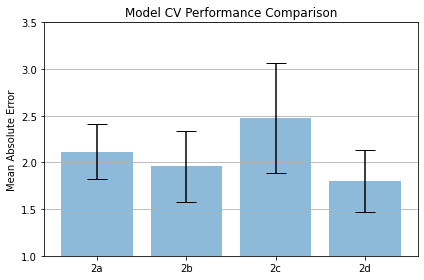

In [ ]:
# let's plot the CV MAEs, with their error bars:

import matplotlib.pyplot as plt

def plot_model_scores(df_scores, y_range=(1.0, 3.5)):

  labels = list(df_scores["model_name"].values)
  means = list(df_scores["mean_mae"].values)
  stdevs = list(df_scores["std"].values)

  # Build the plot
  x_pos = np.arange(len(labels))
  fig, ax = plt.subplots()
  ax.bar(x_pos, 
        means,
        yerr=stdevs,
        align='center',
        alpha=0.5,
        ecolor='black',
        capsize=10)
  ax.set_ylabel('Mean Absolute Error')
  ax.set_xticks(x_pos)
  ax.set_xticklabels(labels)
  ax.set_title('Model CV Performance Comparison')
  ax.yaxis.grid(True)

  # Save the figure and show
  plt.tight_layout()
  plt.savefig('bar_plot_with_error_bars.png')
  plt.ylim(y_range)
  plt.show()

plot_model_scores(df_scores)

In [ ]:
# Note: we're selecting our best model based on the mean MAE from CV scoring, 
# however, most of these overlap to within statistical error. If we wanted to be
# really sure, we'd need to use more CV splits to get those error bars smaller, 
# to understand whether these performance differences were truly statistically
# significant.

NOTE: 2 additional points are awarded based on code documentation and overall clarity of work.

In [ ]:
# We were looking for clear explanation of results with each response. We want you to attempt to 
# explain the _how_ and _why_ behind your answers, and not just the what, do demonstrate
# your knowledge of the concepts discussed in class. Answers should be backed up with
# visualizations (e.g. plots, charts) where demonstrated, such as shown in these solutions. 
# Code should be easy to follow by using sensical naming conventions for function and variable
# names, providing useful code comments, and refactoring repeated code into re-usable functions. 